# Character Classifier Using k-Means

In [1]:
# Load MNIST Dataset
from tensorflow.examples.tutorials.mnist import input_data

# Save MNIST Dataset
mnist = input_data.read_data_sets("MNIST_data/", reshape=False)

# Save training, validation, and test sets
X_train, y_train           = mnist.train.images, mnist.train.labels
X_validation, y_validation = mnist.validation.images, mnist.validation.labels
X_test, y_test             = mnist.test.images, mnist.test.labels

# Verify that number of images in each set matches the number of labels in the same set
assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

# Print out the shape of one image so that we know what the dimensions of the data are
print()
print("Image Shape: {}".format(X_train[0].shape))
print()

# Print out the size of each set
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz

Image Shape: (28, 28, 1)

Training Set:   55000 samples
Validation Set: 5000 samples
Test Set:       10000 samples


In [2]:
import numpy as np

# Pad images with 0s
# Transform 28x28 images into 32x32 images (by adding padding) that LeNet can process
X_train      = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_validation = np.pad(X_validation, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test       = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')
    
print("Updated Image Shape: {}".format(X_train[0].shape))

Updated Image Shape: (32, 32, 1)


Indices: 30688, 9640, 22444, 30688, 9640, 22444


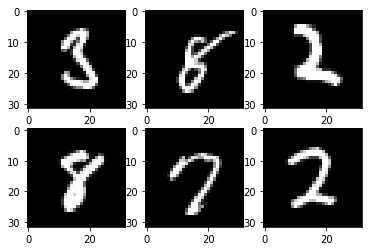

In [29]:
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Select random images from training set so we can
# see the size of our data, and print out the labels
index1 = random.randint(0, len(X_train))
image1 = X_train[index1].squeeze()
index2 = random.randint(0, len(X_train))
image2 = X_train[index2].squeeze()
index3 = random.randint(0, len(X_train))
image3 = X_train[index3].squeeze()
index4 = random.randint(0, len(X_train))
image4 = X_train[index4].squeeze()
index5 = random.randint(0, len(X_train))
image5 = X_train[index5].squeeze()
index6 = random.randint(0, len(X_train))
image6 = X_train[index6].squeeze()

# Plot randomly selected images from training set
fig = plt.figure()
print("Indices: "+str(index1) +", "+str(index2)+", "+str(index3)+", "+str(index1) +", "+str(index2)+", "+str(index3))
fig.add_subplot(2,3,1)
plt.imshow(image1.squeeze(), cmap="gray")
fig.add_subplot(2,3,2)
plt.imshow(image2.squeeze(), cmap="gray")
fig.add_subplot(2,3,3)
plt.imshow(image3.squeeze(), cmap="gray")
fig.add_subplot(2,3,4)
plt.imshow(image4.squeeze(), cmap="gray")
fig.add_subplot(2,3,5)
plt.imshow(image5.squeeze(), cmap="gray")
fig.add_subplot(2,3,6)
plt.imshow(image6.squeeze(), cmap="gray")

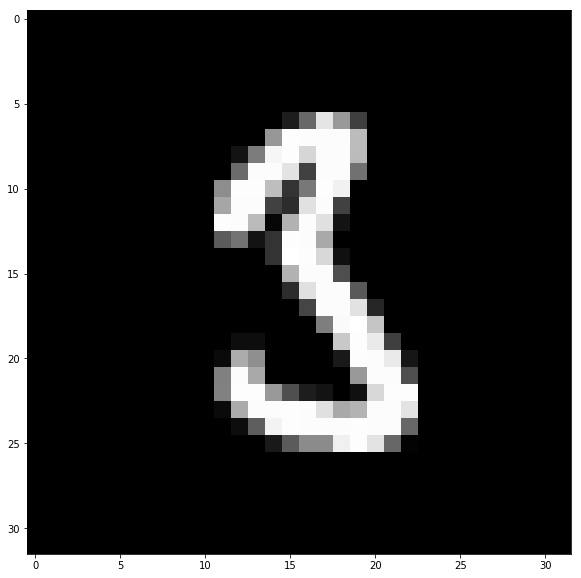

In [30]:
plt.figure(figsize=(10,10))
plt.imshow(image1.squeeze(), cmap="gray")

In [31]:
type(image1)
#print(image1.tostring())
print(image1.shape)
image1
nonzeros = []

#for i in image1:
#    print(type(i))
#    if i != 0.:
#        nonzeros.append(i)
#print(nonzeros)

image1[16]

(32, 32)


array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.17254902,  0.87843144,  0.98823535,  0.98823535,  0.34901962,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ], dtype=float32)